# Limpiar y juntar DATOS

In [5]:
import pandas as pd
import numpy as np

# Cargar los archivos
archivo1 = 'Datos_19052.xlsx'
archivo2 = 'Datos_19185.xlsx'

df1 = pd.read_excel(archivo1)
df2 = pd.read_excel(archivo2)

# Convertir a datetime y limpiar valores
for df in [df1, df2]:
    df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce')
    df.replace('NULO', np.nan, inplace=True)
    df.dropna(subset=['FECHA'], inplace=True)

# Convertir columnas numéricas si quedaron como string
columnas_numericas = ['TMAX', 'TMIN', 'PRECIPITACION']
for col in columnas_numericas:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')
    df2[col] = pd.to_numeric(df2[col], errors='coerce')

# Filtrar hasta el 1 de marzo de 2025
fecha_corte = pd.to_datetime('2025-03-01')
df1 = df1[df1['FECHA'] < fecha_corte]
df2 = df2[df2['FECHA'] < fecha_corte]

# Obtener años comunes
años1 = set(df1['FECHA'].dt.year.unique())
años2 = set(df2['FECHA'].dt.year.unique())
años_comunes = sorted(list(años1 & años2))

df1 = df1[df1['FECHA'].dt.year.isin(años_comunes)]
df2 = df2[df2['FECHA'].dt.year.isin(años_comunes)]

# Consolidar los dataframes
df_total = pd.concat([df1, df2], ignore_index=True)

# Eliminar la hora en la columna FECHA
df_total['FECHA'] = df_total['FECHA'].dt.date

# Exportar a nuevo Excel limpio
df_total.to_excel('datos_consolidados.xlsx', index=False)



# Pasar a MYSQL

In [1]:
import pandas as pd
import mysql.connector

# 1. Leer el archivo Excel
path = 'datos_consolidados.xlsx'
archivo_excel = "datos_clima.xlsx"  # Cambia esto por la ruta de tu archivo
df = pd.read_excel(path)  

# 🔹 Reemplazar NaN con valores válidos
# 🔹 Eliminar filas con celdas vacías
df = df.dropna()  
df = df.where(pd.notna(df), None)  # Convierte NaN en None (se inserta como NULL en MySQL)

# 2. Conectar con MySQL
conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Alex1209",
    database="clima"
)
cursor = conexion.cursor()

# 3. Insertar datos en la tabla
for _, fila in df.iterrows():
    sql = """
    INSERT INTO datos_clima (estacion, fecha, precipitacion, tmax, tmin)
    VALUES (%s, %s, %s, %s, %s)
    """
    valores = (fila['ESTACION'], fila['FECHA'].date() if fila['FECHA'] else None, fila['PRECIPITACION'], fila['TMAX'], fila['TMIN'])
    cursor.execute(sql, valores)

# 4. Guardar cambios y cerrar conexión
conexion.commit()
cursor.close()
conexion.close()

print("🚀 Datos insertados correctamente en MySQL")

🚀 Datos insertados correctamente en MySQL


# Gráficas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\Crist\AppData\Local\Temp\ipykernel_3424\3045009226.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Rellenar con el último valor válido


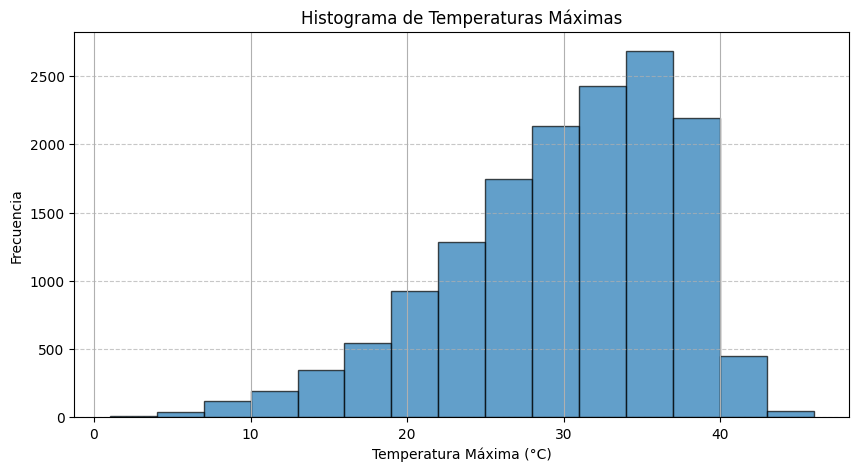

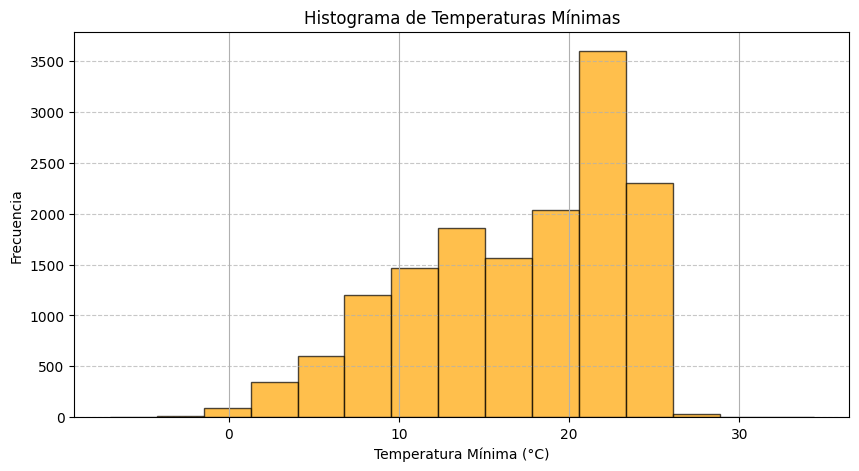

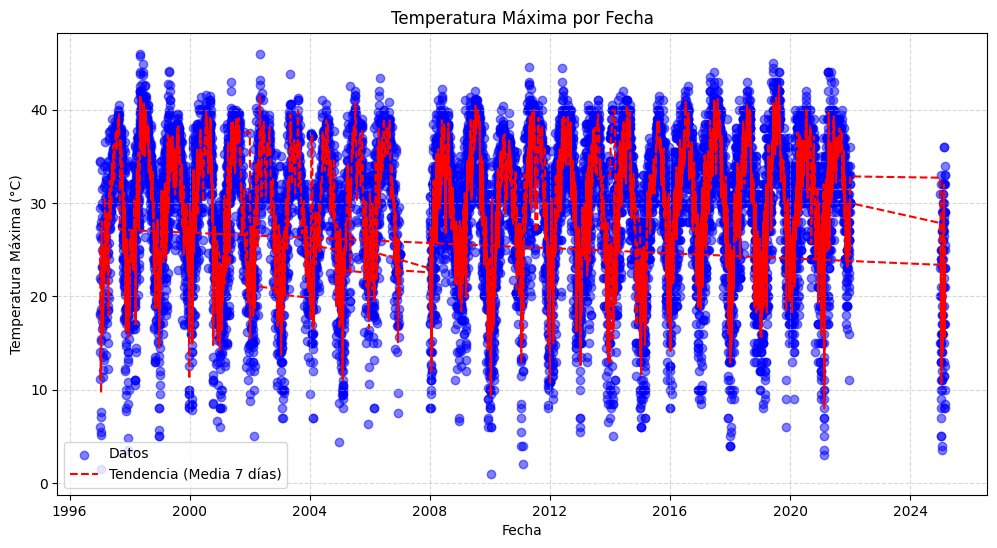

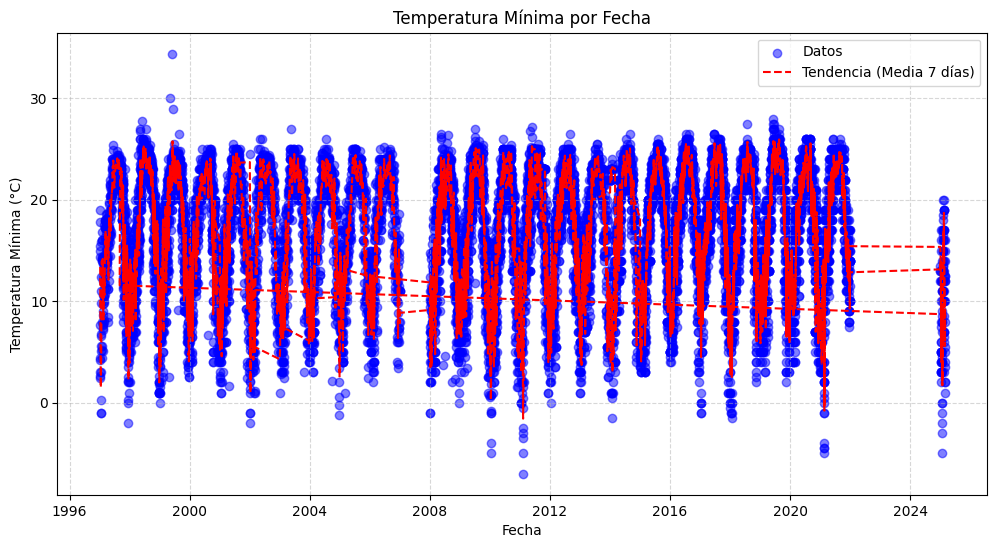

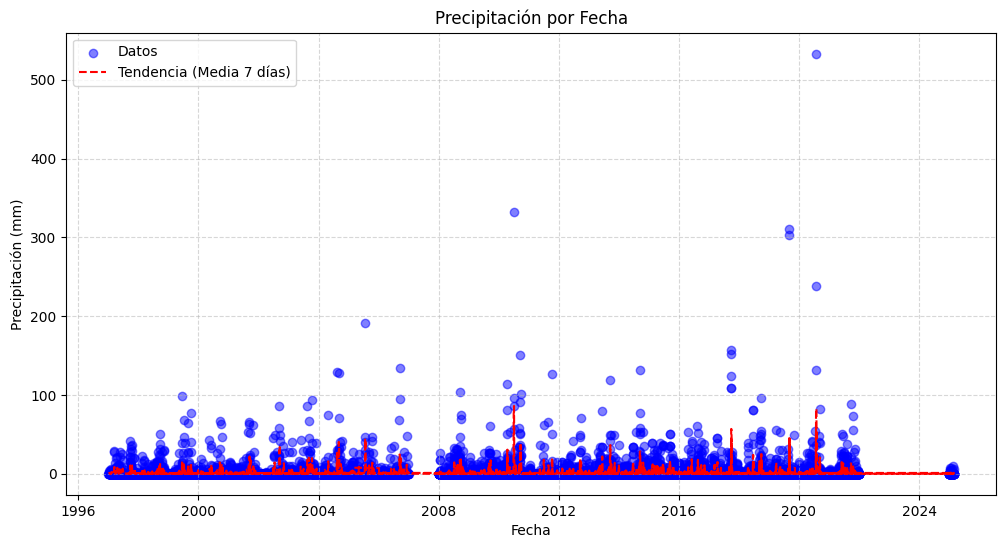

Número de días con lluvia: 3287
Promedio mensual de temperatura máxima:
Mes
Enero         22.544291
Febrero       24.879720
Marzo         28.075790
Abril         31.645309
Mayo          33.893769
Junio         36.008701
Julio         36.075484
Agosto        36.779402
Septiembre    32.913504
Octubre       29.440630
Noviembre     25.155128
Diciembre     22.433879
Name: TMAX, dtype: float64
Promedio mensual de temperatura mínima:
Mes
Enero          9.327616
Febrero       11.133134
Marzo         14.466769
Abril         17.855041
Mayo          20.910622
Junio         22.995385
Julio         23.131415
Agosto        23.463791
Septiembre    21.674715
Octubre       18.153188
Noviembre     13.621974
Diciembre      9.862309
Name: TMIN, dtype: float64
Promedio mensual de lluvias:
Mes
Enero         0.590642
Febrero       0.697161
Marzo         0.944156
Abril         1.361089
Mayo          1.474217
Junio         2.180120
Julio         2.478473
Agosto        1.777793
Septiembre    6.499480
Octubre   

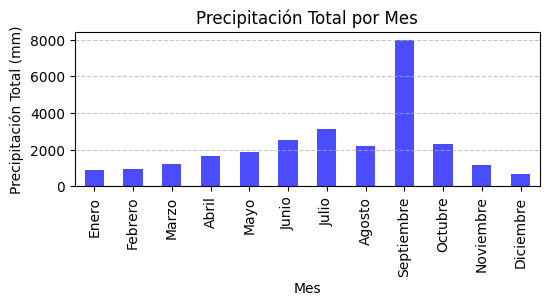

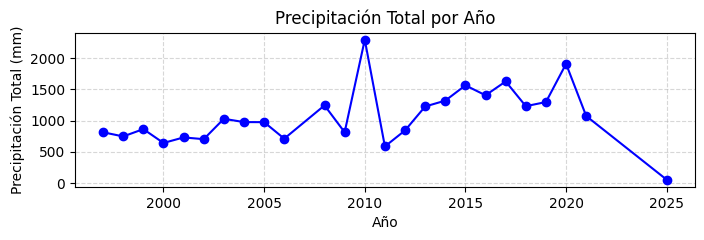

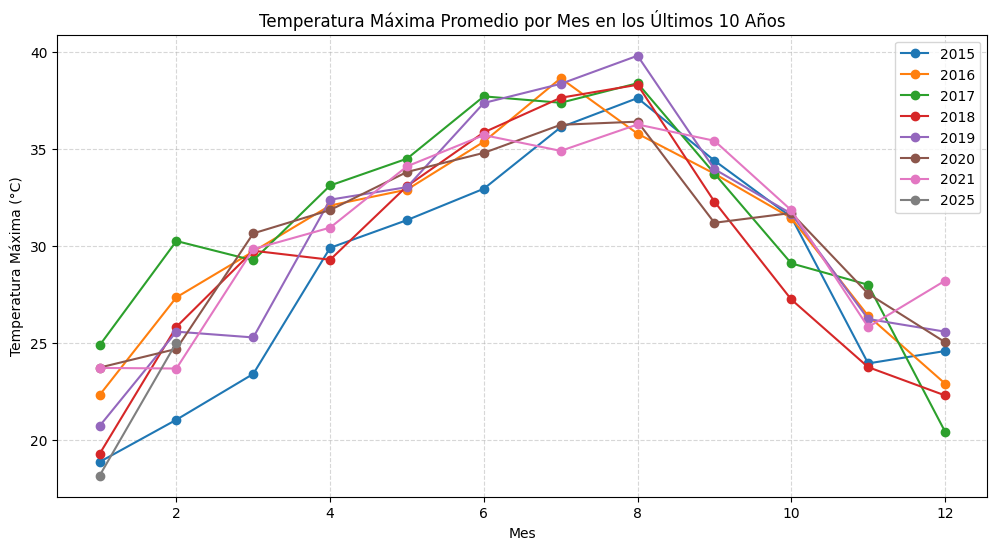

<Figure size 1200x600 with 0 Axes>

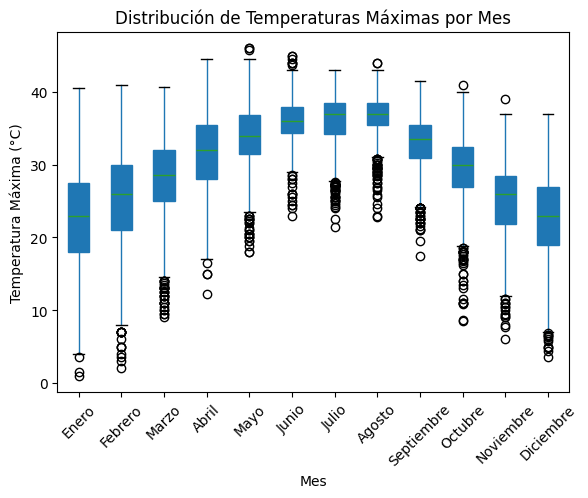

In [4]:
# Cargar los datos
path = 'datos_consolidados.xlsx'
df = pd.read_excel(path)

# 1. Manejo de valores nulos
df.fillna(method='ffill', inplace=True)  # Rellenar con el último valor válido
df.dropna(inplace=True)  # Eliminar filas restantes con valores nulos

# 2. Convertir la columna de fechas a datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# 3. Histogramas mejorados
plt.figure(figsize=(10,5))
df['TMAX'].hist(bins=15, edgecolor='black', alpha=0.7)
plt.title('Histograma de Temperaturas Máximas')
plt.xlabel('Temperatura Máxima (°C)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10,5))
df['TMIN'].hist(bins=15, edgecolor='black', alpha=0.7, color='orange')
plt.title('Histograma de Temperaturas Mínimas')
plt.xlabel('Temperatura Mínima (°C)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Gráfica de temperatura máxima por fecha con línea de tendencia
plt.figure(figsize=(12,6))
plt.scatter(df['FECHA'], df['TMAX'], color='blue', label='Datos', alpha=0.5)
plt.plot(df['FECHA'], df['TMAX'].rolling(window=7).mean(), linestyle='dashed', color='red', label='Tendencia (Media 7 días)')
plt.title('Temperatura Máxima por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Máxima (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 5. Gráfica de temperatura minima por fecha con línea de tendencia
plt.figure(figsize=(12,6))
plt.scatter(df['FECHA'], df['TMIN'], color='blue', label='Datos', alpha=0.5)
plt.plot(df['FECHA'], df['TMIN'].rolling(window=7).mean(), linestyle='dashed', color='red', label='Tendencia (Media 7 días)')
plt.title('Temperatura Mínima por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Temperatura Mínima (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 6. Gráfica de precipitacion por fecha con línea de tendencia
plt.figure(figsize=(12,6))
plt.scatter(df['FECHA'], df['PRECIPITACION'], color='blue', label='Datos', alpha=0.5)
plt.plot(df['FECHA'], df['PRECIPITACION'].rolling(window=7).mean(), linestyle='dashed', color='red', label='Tendencia (Media 7 días)')
plt.title('Precipitación por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Precipitación (mm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 7. Contar días con lluvia
days_with_rain = (df['PRECIPITACION'] > 0).sum()
print(f"Número de días con lluvia: {days_with_rain}")

# 8. Promedio mensual de temperatura máxima con nombres de meses
meses_nombres = {
    1: "Enero", 2: "Febrero", 3: "Marzo", 4: "Abril",
    5: "Mayo", 6: "Junio", 7: "Julio", 8: "Agosto",
    9: "Septiembre", 10: "Octubre", 11: "Noviembre", 12: "Diciembre"
}

df['Mes'] = df['FECHA'].dt.month
monthly_avg = df.groupby('Mes')['TMAX'].mean()
monthly_avg2 = df.groupby('Mes')['TMIN'].mean()
monthly_avg3 = df.groupby('Mes')['PRECIPITACION'].mean()
monthly_avg.index = monthly_avg.index.map(meses_nombres)
monthly_avg2.index = monthly_avg2.index.map(meses_nombres)
monthly_avg3.index = monthly_avg3.index.map(meses_nombres)

print("Promedio mensual de temperatura máxima:")
print(monthly_avg)
print("Promedio mensual de temperatura mínima:")
print(monthly_avg2)
print("Promedio mensual de lluvias:")
print(monthly_avg3)

# 9. Análisis de lluvia por mes y por año
df['Año'] = df['FECHA'].dt.year
rain_by_month = df.groupby('Mes')['PRECIPITACION'].sum()
rain_by_month.index = rain_by_month.index.map(meses_nombres)
rain_by_year = df.groupby('Año')['PRECIPITACION'].sum()

plt.figure(figsize=(6,2))
rain_by_month.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Precipitación Total por Mes')
plt.xlabel('Mes')
plt.ylabel('Precipitación Total (mm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(8,2))
plt.plot(rain_by_year.index, rain_by_year.values, marker='o', linestyle='-', color='blue')
plt.title('Precipitación Total por Año')
plt.xlabel('Año')
plt.ylabel('Precipitación Total (mm)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 10. Análisis de temperatura por mes en los últimos 10 años
last_10_years = df[df['Año'] >= df['Año'].max() - 10]
temp_by_month_year = last_10_years.pivot_table(index='Mes', columns='Año', values='TMAX', aggfunc='mean')

plt.figure(figsize=(12,6))
for year in temp_by_month_year.columns:
    plt.plot(temp_by_month_year.index, temp_by_month_year[year], marker='o', linestyle='-', label=year)
plt.title('Temperatura Máxima Promedio por Mes en los Últimos 10 Años')
plt.xlabel('Mes')
plt.ylabel('Temperatura Máxima (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# 11. Boxplot de temperatura por mes
plt.figure(figsize=(12,6))
df.boxplot(column='TMAX', by='Mes', patch_artist=True, grid=False)
plt.xticks(ticks=range(1,13), labels=meses_nombres.values(), rotation=45)
plt.title('Distribución de Temperaturas Máximas por Mes')
plt.xlabel('Mes')
plt.ylabel('Temperatura Máxima (°C)')
plt.suptitle('')
plt.show()
